Take Home Assignment 3

3.0 Install any dependencies if needed


In [1]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import supervision as sv

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


3.1.1 Draw the segmentation mask of the largest car: Use ultralytics library only

In [11]:
img = cv2.imread("demo5_images/cars1.jpg")


0: 416x640 14 cars, 3834.7ms
Speed: 3.8ms preprocess, 3834.7ms inference, 33.6ms postprocess per image at shape (1, 3, 416, 640)


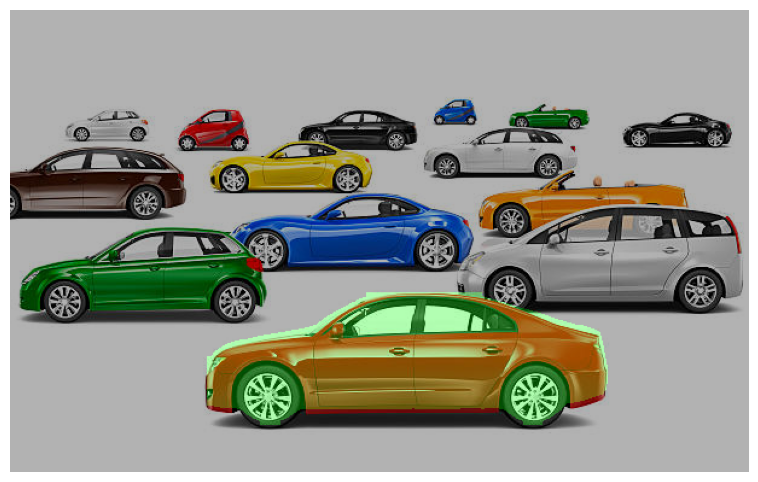

In [24]:
# Load the YOLOv8 segmentation model
model = YOLO("yolov8x-seg.pt")  # You can change to yolov8s-seg.pt or other variants

# Read the image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Run inference
results = model(img_rgb)[0]  # Get the first result

largest_area = 0
largest_mask = None

# Iterate through detected objects
for i, (box, mask) in enumerate(zip(results.boxes.xyxy, results.masks.data)):
    x1, y1, x2, y2 = box  # Bounding box coordinates
    area = (x2 - x1) * (y2 - y1)  # Calculate bounding box area

    if area > largest_area:
        largest_area = area
        largest_mask = mask.cpu().numpy()  # Convert to NumPy array

# Draw the largest mask if found
if largest_mask is not None:
    mask_resized = cv2.resize(largest_mask, (img.shape[1], img.shape[0]))
    mask_binary = (mask_resized > 0.5).astype(np.uint8)  # Convert to binary mask

    # Overlay the mask on the image
    mask_colored = np.zeros_like(img_rgb)
    mask_colored[:, :, 2] = mask_binary * 255  # Color mask in blue
    masked_img = cv2.addWeighted(img_rgb, 0.7, mask_colored, 0.3, 0)

    # Show the result
    plt.figure(figsize=(10, 6))
    plt.imshow(masked_img)
    plt.axis("off")
    plt.show()
else:
    print("No car detected with a valid mask.")


3.1.2 Draw the segmentation mask of the largest car : Use ultralytics + supervision libraries


0: 416x640 14 cars, 560.0ms
Speed: 3.4ms preprocess, 560.0ms inference, 34.4ms postprocess per image at shape (1, 3, 416, 640)


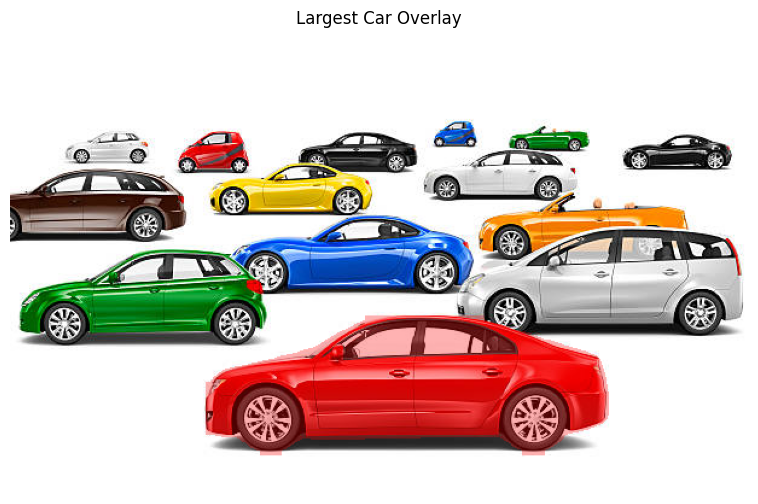

In [87]:
# Import required libraries
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import supervision as sv

# Load the YOLO segmentation model (e.g., yolov8s-seg)
model = YOLO("yolov8s-seg.pt")

# Read the input image
image_path = "demo5_images/cars1.jpg"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run YOLO segmentation
results = model(img_rgb)[0]

# Transfer results to supervision format
detections = sv.Detections.from_ultralytics(results)

# Find the largest mask
largest_mask = None
largest_area = 0
for mask in detections.mask:
    area = np.count_nonzero(mask)
    if area > largest_area:
        largest_area = area
        largest_mask = mask

# Overlay the largest mask on the original image
if largest_mask is not None:
    overlay = img_rgb.copy()
    overlay[largest_mask] = [255, 0, 0]  # Red overlay
    blended = cv2.addWeighted(img_rgb, 0.7, overlay, 0.3, 0)

    plt.figure(figsize=(10, 6))
    plt.imshow(blended)
    plt.axis("off")
    plt.title("Largest Car Overlay")
    plt.show()
else:
    print("No cars detected in the image.")

3.2 Estimate distance to centroid of chair

Device set to use cpu



0: 384x640 1 chair, 277.2ms
Speed: 3.9ms preprocess, 277.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Estimated depth at centroid (352, 181): 140


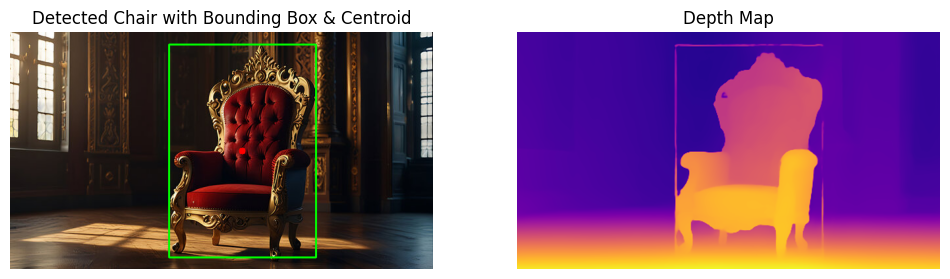

In [89]:
import torch
import cv2
import numpy as np
from ultralytics import YOLO  # Using YOLO for object detection
from transformers import pipeline  # For loading Hugging Face pipeline
from PIL import Image
import matplotlib.pyplot as plt

# Load the object detection model
model = YOLO("yolov8n.pt")  # You can replace with a more specific chair detection model

# Load the depth estimation model using Hugging Face pipeline
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

def detect_chair(image_path):
    image = cv2.imread(image_path)
    results = model(image)[0]

    for detection in results.boxes:
        class_id = int(detection.cls)
        if results.names[class_id] == "chair":
            x1, y1, x2, y2 = map(int, detection.xyxy[0])
            centroid_x = (x1 + x2) // 2
            centroid_y = (y1 + y2) // 2

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

            # Draw centroid
            cv2.circle(image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)  # Red dot

            return image, (centroid_x, centroid_y), (x1, y1, x2, y2)

    return image, None, None

def get_depth_at_centroid(image, centroid):
    if centroid is None:
        print("No chair detected!")
        return None, None

    # Convert the image to RGB format (DepthAnything model might expect RGB format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert OpenCV image to PIL Image
    pil_image = Image.fromarray(image_rgb)

    # Get the depth map using Hugging Face pipeline
    depth_map_pil = pipe(pil_image)["depth"]

    # Convert PIL Image to numpy array for easy indexing
    depth_map = np.array(depth_map_pil)

    # Extract depth value at the centroid position
    depth_value = depth_map[centroid[1], centroid[0]]  # Access depth at centroid
    return depth_map, depth_value

# Main Execution
image_path = "demo5_images/kingChair.jpg"
image, centroid, bbox = detect_chair(image_path)

if centroid:
    depth_map, depth_value = get_depth_at_centroid(image, centroid)
    print(f"Estimated depth at centroid {centroid}: {depth_value}")

    # Plot the image and depth map
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image with bounding box and centroid
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax1.set_title('Detected Chair with Bounding Box & Centroid')
    ax1.axis('off')

    # Plot the depth map
    ax2.imshow(depth_map, cmap='plasma')  # Use a colormap for better visualization
    ax2.set_title('Depth Map')
    ax2.axis('off')

    # Display the plots
    plt.show()
else:
    print("Chair not detected in the image.")


3.3.1  Draw bounding boxes around the "cars" using supervision.

In [4]:
# Downloads the video file from the google drive link, you'll have to "pip install gdown" first
import gdown

file_id = "1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4"
direct_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(direct_url, "vehicles_video.mp4", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4
To: /content/vehicles_video.mp4
100%|██████████| 35.3M/35.3M [00:00<00:00, 109MB/s] 


'vehicles_video.mp4'

In [53]:
model = YOLO("yolo11n.pt")


def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Complete this function

    sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking.mp4",
    callback=callback
)

3.3.1 Track the cars. Add the tracker id to the bounding boxes around the cars. Use supervision

In [81]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Define car class ID (based on COCO dataset, 'car' is class ID 2)
CAR_CLASS_ID = 2

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)

    # Filter detections to include only cars
    car_detections = detections[detections.class_id == CAR_CLASS_ID]

    # Update tracker with only car detections
    car_detections = tracker.update_with_detections(car_detections)

    # Generate labels for detected cars
    labels = [
        f"#{tracker_id} Car"
        for tracker_id in car_detections.tracker_id
    ]

    # Annotate frame with bounding boxes and labels
    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=car_detections)
    return label_annotator.annotate(
        annotated_frame, detections=car_detections, labels=labels)

# Process the video
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_Track_Car.mp4",
    callback=callback
)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 3 cars, 1 truck, 154.9ms
Speed: 5.0ms preprocess, 154.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 175.4ms
Speed: 4.6ms preprocess, 175.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 182.5ms
Speed: 4.6ms preprocess, 182.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 186.6ms
Speed: 4.5ms preprocess, 186.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 160.5ms
Speed: 5.5ms preprocess, 160.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 172.4ms
Speed: 6.3ms preprocess, 172.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 190.6ms
Speed: 4.9ms preprocess, 190.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 174.1

3.3.2 Draw the track traces for the tracked cars. Use supervision

In [80]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

# Define the class ID for "car"
CAR_CLASS_ID = 2

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)

    # Filter detections to include only "car" class
    car_detections = detections[detections.class_id == CAR_CLASS_ID]
    car_detections = tracker.update_with_detections(car_detections)

    labels = [
        f"#{tracker_id} {results.names[class_id]}"
        for class_id, tracker_id
        in zip(car_detections.class_id, car_detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=car_detections)
    annotated_frame = label_annotator.annotate(
        annotated_frame, detections=car_detections, labels=labels)
    return trace_annotator.annotate(
        annotated_frame, detections=car_detections)

sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_Track_Trace_Car.mp4",
    callback=callback
)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 384x640 3 cars, 1 truck, 489.3ms
Speed: 4.8ms preprocess, 489.3ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 458.3ms
Speed: 9.9ms preprocess, 458.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 602.4ms
Speed: 12.8ms preprocess, 602.4ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 419.3ms
Speed: 9.6ms preprocess, 419.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 277.9ms
Speed: 4.9ms preprocess, 277.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 304.3ms
Speed: 4.9ms preprocess, 304.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 300.8ms
Speed: 4.9ms preprocess, 300.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 292.

Questions:

Explain what "def callback(frame: np.ndarray, _: int) -> np.ndarray:" does.

# **Breakdown**

1. **Function Name**  
   - **callback** is the name of the function.

2. **Parameters:**  
   - **frame: np.ndarray**  
     - This parameter indicates that **frame** is expected to be a NumPy array (**np.ndarray**).  
     - Typically, in image/video processing, **frame** represents an image or a frame of a video.
   - **_int**  
     - The underscore (**_**) is often used to indicate that this parameter is not used within the function.  
     - It is still required for function signature consistency.
     - The annotation **int** suggests that this parameter is an integer (though it is not used in the function).

3. **Return Type**  
   - **-> np.ndarray**  
     - This means the function is expected to return a NumPy array.

# **Purpose**
- This function is a **callback function**, which is commonly used in event-driven programming, real-time processing, or streaming applications.
- Given an input **frame** (a NumPy array), it processes the frame and returns a modified version of it.
- The unused integer parameter (**_**) suggests that the function might be used in a larger framework that expects a callback function with this signature.

